# Data visualization and preprocessing

This script generates all kinds of figures and pre-processes the data to a very limited extent (binarization of very rare features).

## Data loading

### Dataset loading

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import python_proj.utils.exp_utils as exp_utils

data_file_name = "dataset_90_days_started_11_07_23"

data_path_format = exp_utils.BASE_PATH + '/final_data/{data_file_name}.csv'
data_path = data_path_format.format(data_file_name=data_file_name)
print(f'{data_path=}')


df: pd.DataFrame = pd.read_csv(filepath_or_buffer=data_path, header=0)

print(f'{len(df)=}.')
print(f'{len(df.columns)=}\n')
print(f'{df.columns=}')

df.describe()


data_path='/workspaces/msc_thesis/data//final_data/dataset_90_days_started_11_07_23.csv'
len(df)=1815972.
len(df.columns)=92

df.columns=Index(['ID', 'Project Name', 'Submitter ID', 'PR Number', 'Closed At',
       'PullRequestIsMerged', 'SubmitterIsFirstTimeContributor',
       'ControlIntegratedBySameUser', 'ControlPullRequestLifeTimeInMinutes',
       'ControlPullRequestHasComments', 'ControlNumberOfCommitsInPullRequest',
       'ControlPullRequestHasCommentByExternalUser',
       'ControlHasHashTagInDescription',
       'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)',
       'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-In)',
       'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-In)',
       'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-In)',
       'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In)',
       'FirstOrderDe

,ID,Submitter ID,PR Number,ControlPullRequestLifeTimeInMinutes,ControlNumberOfCommitsInPullRequest,FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In),FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-In),FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-In),FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-In),FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In),...,IntraProjectSubmitterIssueCommentCount,SharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator,SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter,SharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter,EcosystemExperienceSubmitterIssueSubmissionCount,EcosystemExperienceSubmitterIssueCommentCount,DependencyEcosystemExperienceSubmitterIssueSubmissionCount,DependencyEcosystemExperienceSubmitterIssueCommentCount,InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount,InversedDependencyEcosystemExperienceSubmitterIssueCommentCount
count,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,...,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06
mean,1.474751e+08,5.198276e+06,3.807207e+03,3.190111e+04,4.947501e+00,4.264890e+01,1.382600e+01,1.539485e+01,1.021316e+01,1.022213e+01,...,2.256389e+01,5.859595e-01,4.025249e-01,7.930369e+00,2.615631e+00,1.785944e+01,1.743463e-01,8.645552e-01,1.854588e-01,1.355166e+00
std,1.004294e+08,8.100370e+06,8.071615e+03,1.399335e+05,7.283362e+01,2.501879e+03,3.539189e+02,4.735927e+02,3.782511e+02,2.043811e+02,...,7.182644e+01,3.476774e+00,3.021098e+00,7.431202e+01,7.985540e+00,6.700519e+01,1.580686e+00,1.186131e+01,2.446396e+00,1.667164e+01
min,6.870000e+02,1.000000e+00,1.000000e+00,1.666667e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.807322e+07,4.631570e+05,1.000000e+02,5.290000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.371940e+08,1.620265e+06,5.480000e+02,9.799167e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.278026e+08,6.384100e+06,2.817000e+03,7.328350e+03,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.617756e+08,5.976123e+07,8.297600e+04,4.489490e+06,1.000000e+04,3.461280e+05,8.789200e+04,1.227920e+05,1.095040e+05,4.764000e+04,...,2.755000e+03,2.570000e+02,2.190000e+02,1.951100e+04,2.332000e+03,7.630000e+03,3.730000e+02,9.270000e+02,7.410000e+02,2.764000e+03


### Meta stuff

In [2]:

from python_proj.utils.util import safe_save_fig

# The number of headers containing metadata; i.e., the stuff that's unusable for inference.
meta_header_count = 5
pr_merged_key = 'PullRequestIsMerged'
first_time_contributor_key = 'SubmitterIsFirstTimeContributor'

# Figures.
figure_base_path = f"{exp_utils.BASE_PATH}/figures/modelling/{data_file_name}/"

if not os.path.exists(figure_base_path):
    os.makedirs(figure_base_path)
print(f'{figure_base_path=}')


figure_base_path='/workspaces/msc_thesis/data//figures/modelling/dataset_90_days_started_11_07_23/'


### First-time contributors and Comments By External User

Adds the correct first-time contributor and comments by external user data to the dataframe as datasets generated with the ``sliding window 3`` code are incorrect.

In [3]:

def replace(df1: pd.DataFrame, df2: pd.DataFrame, match_column: str, overwritten_column: str):
    print(f'\nOverwriting {overwritten_column}.')

    replace_data = df2[[match_column, overwritten_column]]

    old_counts = df1[overwritten_column].value_counts()
    print(f'Old/Incorrect:\n{old_counts}')

    df1 = df1.merge(replace_data, how='left', on=match_column,
                    suffixes=("_incorrect", ""))
    old_key = f'{overwritten_column}_incorrect'
    df1 = df1.drop(old_key, axis=1)

    new_counts = df1[overwritten_column].value_counts()
    print(f'\nNew:\n{new_counts}')

    diff = new_counts - old_counts
    print(f'\nDifference:\n{diff}')

    return df1


other_data_name = "dataset_90_days_started_28_06_23"
other_data_path = f'{exp_utils.BASE_PATH}/final_data/{other_data_name}.csv'
print(f'{other_data_path=}\n')

other_df: pd.DataFrame = pd.read_csv(other_data_path)

df = replace(df, other_df, 'ID', first_time_contributor_key)
df = replace(df, other_df, 'ID', 'ControlPullRequestHasCommentByExternalUser')


# ftc_flag_data = ftc_flag_data[['ID', first_time_contributor_key]]

# old_counts = df[first_time_contributor_key].value_counts()
# print(f'Old/Incorrect:\n{old_counts}')

# df = df.merge(ftc_flag_data, how='left', on='ID', suffixes=("_incorrect", ""))
# old_ftc_key = f'{first_time_contributor_key}_incorrect'
# df = df.drop(old_ftc_key, axis=1)

# new_counts = df[first_time_contributor_key].value_counts()
# print(f'\nNew:\n{new_counts}')

# diff = new_counts - old_counts
# print(f'\nDifference:\n{diff}')


other_data_path='/workspaces/msc_thesis/data//final_data/dataset_90_days_started_28_06_23.csv'


Overwriting SubmitterIsFirstTimeContributor.
Old/Incorrect:
SubmitterIsFirstTimeContributor
False    1064835
True      751137
Name: count, dtype: int64

New:
SubmitterIsFirstTimeContributor
False    1293737
True      536234
Name: count, dtype: int64

Difference:
SubmitterIsFirstTimeContributor
False    228902
True    -214903
Name: count, dtype: int64

Overwriting ControlPullRequestHasCommentByExternalUser.
Old/Incorrect:
ControlPullRequestHasCommentByExternalUser
False    1206741
True      623230
Name: count, dtype: int64

New:
ControlPullRequestHasCommentByExternalUser
False    1292714
True      565255
Name: count, dtype: int64

Difference:
ControlPullRequestHasCommentByExternalUser
False    85973
True    -57975
Name: count, dtype: int64


## Demographics Visualization

### Pulls over time

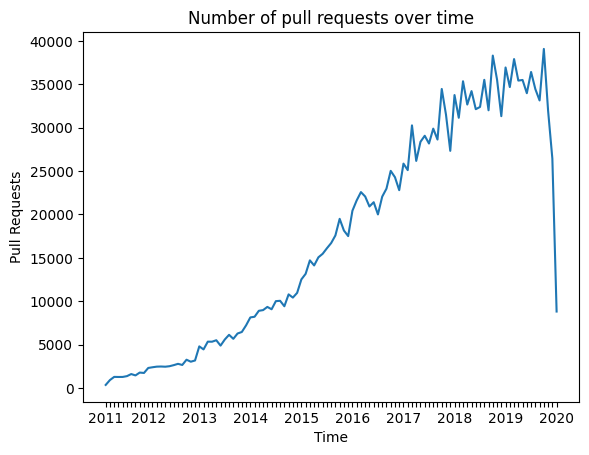

In [4]:
dates = pd.to_datetime(df['Closed At'], format="%Y-%m-%dT%H:%M:%SZ")

pr_count_per_year_month = dates.groupby(
    [dates.dt.year, dates.dt.month]).count()
axs = pr_count_per_year_month.plot(kind="line")

# Fixes x-ticks to be less cluttered.
xticks_years = []
last_year = -1
for (year, _) in pr_count_per_year_month.keys():
    if last_year != year:
        last_year = year
        xticks_years.append(year)
    else:
        xticks_years.append('')
axs.set_xticks(range(len(xticks_years)))
axs.set_xticklabels(xticks_years)

axs.set_xlabel("Time")
axs.set_ylabel("Pull Requests")
axs.set_title("Number of pull requests over time")

output_path = f'{figure_base_path}/demographics/pr_count_per_year_month.png'
safe_save_fig(output_path)

plt.show()


### Pulls per project

percentile=98
percentile_index=19650
Top project count: 402
Pull Requests below 98th percentile: 945630/1857969 (50.896%)

pulls_cap=694
capped_top_pulls_count=278988
bottom_pull_count + capped_top_pulls_count=1224618


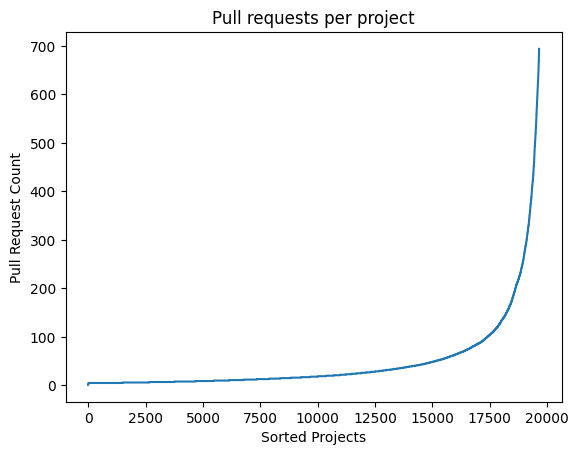

In [5]:
import math


def __plot(__df, figure_name: str):
    plt.clf()
    axs = __df.plot(kind="line", use_index=False)
    axs.set_xlabel("Sorted Projects")
    axs.set_ylabel("Pull Request Count")
    axs.set_title("Pull requests per project")
    output_path = f'{figure_base_path}/demographics/{figure_name}.png'
    safe_save_fig(output_path)


# all data plot
pr_count_per_project = dates.groupby(df['Project Name']).count()
pr_count_per_project = pr_count_per_project.sort_values()
__plot(pr_count_per_project, "prs_per_project_all")

# up to 97th Percentile plot
project_count = len(pr_count_per_project)
# NOTE: with the 74th percentile the PR counts of the capped
# elite and the rest are approximately equal. The total number
# of entries is then 479.801.
percentile = 98
print(f'{percentile=}')
percentile_index = math.floor(project_count * percentile / 100)
print(f'{percentile_index=}')
print(f'Top project count: {project_count - percentile_index}')
perc_data = pr_count_per_project.iloc[:percentile_index]
__plot(perc_data, f"prs_per_project_up_to_{percentile}th_percentile")

# Printing some stats.
total_pull_count = sum(pr_count_per_project.values)
bottom_pull_count = sum(perc_data.values)
ratio = 100 * bottom_pull_count / total_pull_count
print(f'Pull Requests below {percentile}th percentile: '
      + f'{bottom_pull_count}/{total_pull_count} ({ratio:.03f}%)\n')

# Calcualtes cap
pulls_cap = max(perc_data.values)
capped_top_pulls_count = pulls_cap * (project_count - percentile_index)
print(f'{pulls_cap=}')
print(f'{capped_top_pulls_count=}')
print(f'{bottom_pull_count + capped_top_pulls_count=}')


## Pulls per project subsampling

In [6]:
top_projects = pr_count_per_project.iloc[percentile_index:]
print(f'{len(top_projects)=}')

# Samples top projects.
df = df.groupby('Project Name').apply(lambda x: x.sample(min(pulls_cap, len(x)))
                                      if x.name in top_projects else x)

print(f'Sub-sampled df length: {len(df)}')


len(top_projects)=402


Sub-sampled df length: 1224618


## Predictor histograms

### Create Histograms for everything

PullRequestIsMerged
ControlIntegratedBySameUser
ControlPullRequestLifeTimeInMinutes
ControlPullRequestHasComments
ControlNumberOfCommitsInPullRequest
ControlHasHashTagInDescription
FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)
FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-In)
FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-In)
FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-In)
FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In)
FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRIntegratorToSubmitter-In)
FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToSubmitter-In)
FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToCommenter-In)
FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToCommenter-In)
FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToSubmitter-In)
FirstOrder

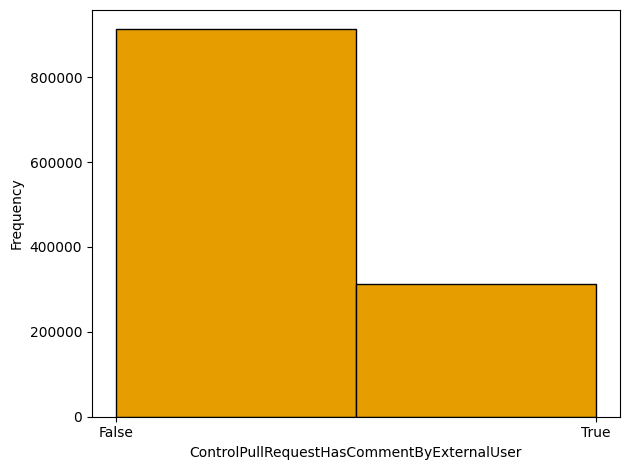

In [7]:
import copy

default_plot_settings = {
    'edgecolor': 'black',
    'color': "#e69d00"
}

default_plot_settings_2 = copy.deepcopy(default_plot_settings)
default_plot_settings_2['color'] = "#56b3e9"


def __fix_x_label_fontsize(__column):
    # Adjusts x-label's fontsize to fit the text.
    fig = plt.gcf()
    fig_width = fig.get_figwidth()
    xlabel_fontsize = int(fig_width * 100 / len(__column))
    ax = plt.gca()
    orig_fontsize = ax.xaxis.label.get_fontsize()
    ax.xaxis.label.set_fontsize(min(xlabel_fontsize, orig_fontsize))


def create_histogram(_df: pd.DataFrame, _column: str,
                     subfolder_name: str = "",
                     show_without_zeroes: bool = False):
    can_create_feature_histograms = True

    if not can_create_feature_histograms:
        return

    binary_fields = _df.select_dtypes(exclude='number').columns

    print(_column)
    plt.clf()
    entries = _df[_column]

    if _column in binary_fields:
        entries = _df[_column].replace({False: 0, True: 1})
        plt.xticks([0, 1], ['False', 'True'])
        plt.hist(entries, bins=2, **default_plot_settings)
        plt.ylabel('Frequency')
    # elif __column in shown_fields_without_zeroes:
    elif show_without_zeroes:
        _, bins, _ = plt.hist(entries, bins=30, alpha=1,
                              label="All Data", **default_plot_settings)
        ax: plt.Axes = plt.gca()
        ax.set_ylabel("Frequency")
        ax.set_xlabel(_column)
        __fix_x_label_fontsize(_column)

        filtered_data = _df[_column][_df[_column] != 0]
        ax2 = ax.twinx()

        ax2.hist(filtered_data, bins, alpha=0.5,
                 label='Excl. zeroes', **default_plot_settings_2)
        ax2.set_ylabel("Frequency (x > 0)")
        ax2.set_zorder(10)
        plt.tight_layout()
    else:
        plt.hist(entries, bins=30, **default_plot_settings)
        plt.ylabel('Frequency')

    plt.xlabel(_column)
    __fix_x_label_fontsize(_column)
    plt.tight_layout()

    output_path = f"{figure_base_path}/distributions/{subfolder_name}/{_column}.png"
    safe_save_fig(output_path)


def create_predictor_histograms(__df: pd.DataFrame, subfolder_name: str = ""):
    # Iterate over the columns and generate histograms
    for column in __df.columns[meta_header_count:]:
        create_histogram(__df, column, subfolder_name,
                         show_without_zeroes=True)


create_predictor_histograms(df, subfolder_name="untransformed")


### Histograms Success Rate

This is done separately as success rate has a meaningfull zero score, whereas all observations without any PR submissions are also assigned 0. 

IntraProjectSubmitterPullRequestSuccessRate
EcosystemExperienceSubmitterPullRequestSuccessRate
DependencyEcosystemExperienceSubmitterPullRequestSuccessRate
InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate


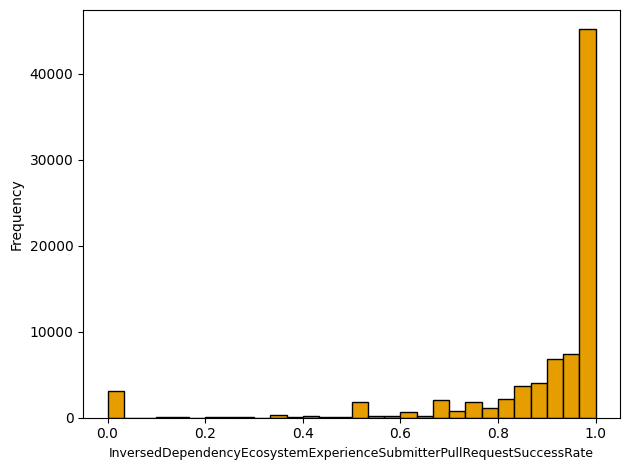

In [8]:
import regex as re

ratio_fields = [field for field in df.columns if len(
    re.findall(r'.*SuccessRate.*', field)) > 0]

for field in ratio_fields:
    related_count_field = field[:-len('SuccessRate')] + "SubmissionCount"
    tmp_df = df[df[related_count_field] != 0]
    create_histogram(tmp_df, field, subfolder_name="success_rate")


## Transformation

Highly skewed data is terrible for logistic regresson and might be the cause for highly non-linear partial dependence in random forest. Therefore, some of the data is transformed.

### Transform visualization success ratios

/tmp/ipykernel_83962/4125397458.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


IntraProjectSubmitterPullRequestSuccessRate^2


/tmp/ipykernel_83962/4125397458.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


IntraProjectSubmitterPullRequestSuccessRate^2


/tmp/ipykernel_83962/4125397458.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


EcosystemExperienceSubmitterPullRequestSuccessRate^2


/tmp/ipykernel_83962/4125397458.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


EcosystemExperienceSubmitterPullRequestSuccessRate^2
DependencyEcosystemExperienceSubmitterPullRequestSuccessRate^2


/tmp/ipykernel_83962/4125397458.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)
/tmp/ipykernel_83962/4125397458.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


DependencyEcosystemExperienceSubmitterPullRequestSuccessRate^2
InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate^2


/tmp/ipykernel_83962/4125397458.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)
/tmp/ipykernel_83962/4125397458.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate^2


/tmp/ipykernel_83962/4125397458.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


cbrt(IntraProjectSubmitterPullRequestSuccessRate)


/tmp/ipykernel_83962/4125397458.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


cbrt(IntraProjectSubmitterPullRequestSuccessRate)


/tmp/ipykernel_83962/4125397458.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


cbrt(EcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_83962/4125397458.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


cbrt(EcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_83962/4125397458.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


cbrt(DependencyEcosystemExperienceSubmitterPullRequestSuccessRate)
cbrt(DependencyEcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_83962/4125397458.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)
/tmp/ipykernel_83962/4125397458.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


cbrt(InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate)
cbrt(InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_83962/4125397458.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)
/tmp/ipykernel_83962/4125397458.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


log(1 + IntraProjectSubmitterPullRequestSuccessRate)


/tmp/ipykernel_83962/4125397458.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


log(1 + IntraProjectSubmitterPullRequestSuccessRate)


/tmp/ipykernel_83962/4125397458.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


log(1 + EcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_83962/4125397458.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


log(1 + EcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_83962/4125397458.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


log(1 + DependencyEcosystemExperienceSubmitterPullRequestSuccessRate)
log(1 + DependencyEcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_83962/4125397458.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)
/tmp/ipykernel_83962/4125397458.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


log(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate)
log(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_83962/4125397458.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


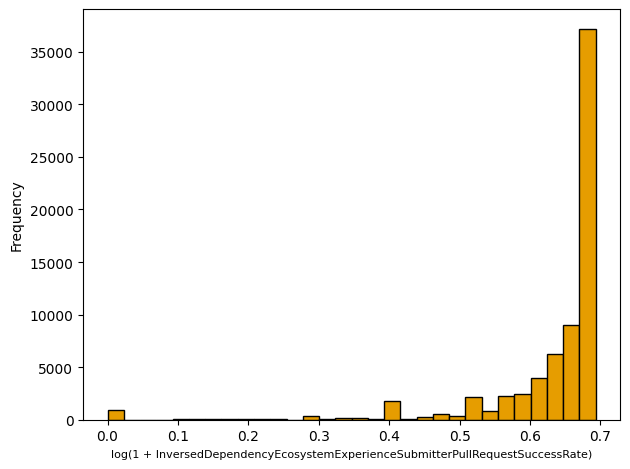

In [9]:
import numpy as np

success_ratio_fields = [field for field in df.columns if len(
    re.findall(r'.*SuccessRate.*', field)) > 0]

# squared-transform
for field in success_ratio_fields:
    related_count_field = field[:-len('SuccessRate')] + "SubmissionCount"

    def transform(x): return x ** 2

    # Excludes zero PR count entries.
    test_df = df[df[related_count_field] != 0]
    field_name = f'{field}^2'
    test_df[field_name] = test_df[field].apply(transform)
    create_histogram(test_df, field_name,
                     "squared_success_ratio_no_zero_count")

    # Excludes one  PR entries as well.
    test_df = df[df[related_count_field] > 1]
    test_df[field_name] = test_df[field].apply(transform)
    create_histogram(test_df, field_name,
                     "squared_success_ratio_no_zero_or_one_count")


# cbrt-transform
for field in success_ratio_fields:
    related_count_field = field[:-len('SuccessRate')] + "SubmissionCount"

    def transform(x): return np.cbrt(x)

    # Excludes zero PR count entries.
    test_df = df[df[related_count_field] != 0]
    field_name = f'cbrt({field})'
    test_df[field_name] = test_df[field].apply(transform)
    create_histogram(test_df, field_name,
                     "cbrt_success_ratio_no_zero_count")

    # Excludes one  PR entries as well.
    test_df = df[df[related_count_field] > 1]
    test_df[field_name] = test_df[field].apply(transform)
    create_histogram(test_df, field_name,
                     "cbrt_success_ratio_no_zero_or_one_count")

# log-transform
for field in success_ratio_fields:
    related_count_field = field[:-len('SuccessRate')] + "SubmissionCount"

    def transform(x): return np.log(1 + x)

    # Excludes zero PR count entries.
    test_df = df[df[related_count_field] != 0]
    field_name = f'log(1 + {field})'
    test_df[field_name] = test_df[field].apply(transform)
    create_histogram(test_df, field_name,
                     "log_success_ratio_no_zero_count")

    # Excludes one  PR entries as well.
    test_df = df[df[related_count_field] > 1]
    test_df[field_name] = test_df[field].apply(transform)
    create_histogram(test_df, field_name,
                     "log_success_ratio_no_zero_or_one_count")


### Transform visualization count data

Visualizes the effect of various transformations on the data.

['ControlPullRequestLifeTimeInMinutes', 'ControlNumberOfCommitsInPullRequest', 'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)', 'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-In)', 'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-In)', 'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-In)', 'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In)', 'FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRIntegratorToSubmitter-In)', 'FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToSubmitter-In)', 'FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToCommenter-In)', 'FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToCommenter-In)', 'FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToSubmitter-In)', 'FirstOrderDegreeCentralityV2(PRCommenterToCommenter.PRIntegratorToSubmitter-In)',

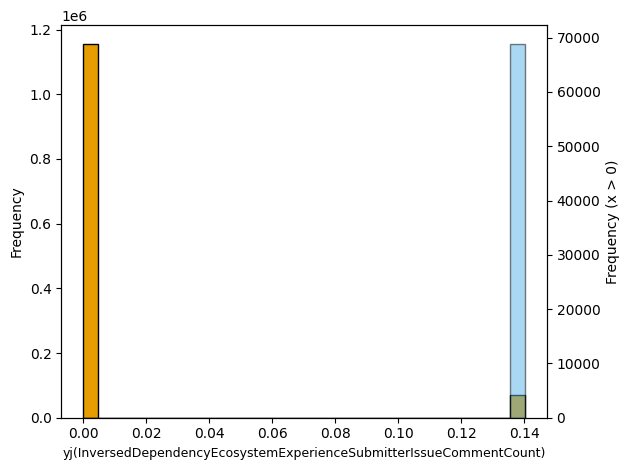

In [10]:
import numpy as np
import regex as re
from scipy.stats import yeojohnson


non_meta_headers = df.columns[meta_header_count:]

continuous_fields = df[non_meta_headers].select_dtypes(
    include='number').columns
continuous_fields = [field for field in continuous_fields if len(
    re.findall(r'.*SuccessRate.*', field)) == 0]

print(continuous_fields)

# Does this for log-transform.
print("\nLog Transform:")
for field in continuous_fields:
    mn = df[field].min()
    print(f'{field}: {mn=}')
    test_df = pd.DataFrame()
    field_name = ''
    if mn >= 1:
        field_name = f'log({field})'
        test_df[field_name] = df[field].apply(lambda x: np.log(x))
    elif mn < 1:
        field_name = f'log(1 + {field})'
        test_df[field_name] = df[field].apply(lambda x: np.log(1 + x))
    else:
        ValueError()
    create_histogram(test_df, field_name, 'log_transformed',
                     show_without_zeroes=True)

# Does this for square root.
print("\nSquare root Transform:")
for field in continuous_fields:
    mn = df[field].min()
    print(f'{field}: {mn=}')
    test_df = pd.DataFrame()
    field_name = ''
    if mn >= 1:
        field_name = f'sqrt({field})'
        test_df[field_name] = df[field].apply(lambda x: np.sqrt(x))
    elif mn < 1:
        field_name = f'sqrt(1 + {field})'
        test_df[field_name] = df[field].apply(lambda x: np.sqrt(1 + x))
    else:
        ValueError()
    create_histogram(test_df, field_name, 'sqrt_transformed',
                     show_without_zeroes=True)


# Does this reciprocal-transform.
print("\nReciprocal Transform:")
for field in continuous_fields:
    mn = df[field].min()
    print(f'{field}: {mn=}')
    test_df = pd.DataFrame()
    field_name = ''
    if mn >= 1:
        field_name = f'recip({field})'
        test_df[field_name] = df[field].apply(lambda x: 1 / x)
    elif mn < 1:
        field_name = f'recip(1 + {field})'
        test_df[field_name] = df[field].apply(lambda x: 1 / (1 + x))
    else:
        ValueError()
    create_histogram(test_df, field_name, 'recip_transformed',
                     show_without_zeroes=True)


# Does this squared-transform.
print("\n Squared Transform:")
for field in continuous_fields:
    mn = df[field].min()
    print(f'{field}: {mn=}')
    test_df = pd.DataFrame()
    field_name = f'{field}^2'
    test_df[field_name] = df[field].apply(lambda x: x ** 2)
    create_histogram(test_df, field_name, 'squared_transformed',
                     show_without_zeroes=True)


print("\nYeo-Johnson:")
for field in continuous_fields:
    test_df = pd.DataFrame()
    field_name = f'yj({field})'
    test_df[field_name], _lambda = yeojohnson(df[field])
    print(f'{field}: {_lambda=}')
    create_histogram(test_df, field_name,
                     'yeo_johnson_transform', show_without_zeroes=True)


### Application of log-transformation

All of the fields are log-transformed as none of the other transforms do anything for the data distribution.

In [11]:
for field in continuous_fields:
    field_name = f'ln(1 + {field})'
    df[field_name] = df[field].apply(lambda x: np.log(1 + x))
    df = df.drop(field, axis=1)


## Rare Event Handling

### Predictor Zero Counts

Counts how many fields have partial zero data to see if they are worth including in this study

In [12]:
import regex as re
from typing import Callable


def count_zeroes(_df: pd.DataFrame):
    zeroes = pd.DataFrame()
    zeroes['zeroes'] = _df.eq(0).sum()
    zeroes['non_zeroes'] = len(_df) - zeroes['zeroes']
    zeroes['percentage_zeroes'] = (zeroes['zeroes'] / len(_df)) * 100

    binary_fields = _df.select_dtypes(exclude='number').columns
    ratio_fields = [field for field in _df.columns if len(
        re.findall(r'.*SuccessRate.*', field)) > 0]

    def get_fields_with_requirements(req: Callable[[str, dict], bool]) -> list[str]:
        included_rows = []
        for name, row_data in zeroes.iterrows():
            # We're only interested in continuous data here.
            # The ratio fields have a meaningful 0.
            if name in binary_fields or name in ratio_fields:
                continue

            if req(name, row_data):
                included_rows.append(name)
                print(
                    f'{name}: {row_data["zeroes"]:.0f} zeroes, {row_data["non_zeroes"]:.0f} non-zeroes ({row_data["percentage_zeroes"]:.03f}% zeroes).')

        return included_rows

    rare_cutoff = 80
    print(f"\nRare events ({rare_cutoff}+% zeroes):")
    rare_events = get_fields_with_requirements(lambda _, row_data:
                                               row_data['percentage_zeroes'] > rare_cutoff)

    print("\nNon-rare events:")
    non_rare_events = get_fields_with_requirements(lambda name, _:
                                                   name not in rare_events)

    return rare_events, non_rare_events


### Rare events over all data

In [13]:
rare_events, non_rare_events = count_zeroes(df)

print("\nEvent counts:")
print(f'{len(rare_events)=}')
print(f'{len(non_rare_events)=}')


Rare events (80+% zeroes):
ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-In)): 997672 zeroes, 226946 non-zeroes (81.468% zeroes).
ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToCommenter-In)): 990664 zeroes, 233954 non-zeroes (80.896% zeroes).
ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.PRCommenterToCommenter-In)): 1041106 zeroes, 183512 non-zeroes (85.015% zeroes).
ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.IssueCommenterToCommenter-In)): 1087438 zeroes, 137180 non-zeroes (88.798% zeroes).
ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.PRCommenterToCommenter-In)): 995395 zeroes, 229223 non-zeroes (81.282% zeroes).
ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.IssueCommenterToCommenter-In)): 1118605 zeroes, 106013 non-zeroes (91.343% zeroes).
ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-Out)): 995860 zeroes, 228758 n

### Rare events for any variable.

In [14]:
import regex as re

df.select_dtypes(include='number')
independent_fields = [field for field in df.select_dtypes(include='number')
                                           .columns[meta_header_count:]
                      if len(list(re.findall(r'.*Control.*', field))) == 0]
print(independent_fields)
independent_df = df[df[independent_fields].gt(0).any(axis=1)]
print(f'{len(independent_df)=}\n')

rare_events, non_rare_events = count_zeroes(independent_df)

print("\nEvent Counts:")
print(f'{len(rare_events)=}')
print(f'{len(non_rare_events)=}')


['DependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRIntegratorToSubmitter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToSubmitter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToCommenter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToCommenter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(

### Rare events over ecosystem experience

It performs the same test but now on entries that have some form of ecosystem experience.

In [15]:
import regex as re

ecosystem_fields = [field for field in df.columns if len(list(
    re.findall(r'.*Ecosystem.*', field))) > 0]
print(ecosystem_fields)
ecosystem_df = df[df[ecosystem_fields].gt(0).any(axis=1)]
print(f'{len(ecosystem_df)=}\n')

rare_events, non_rare_events = count_zeroes(ecosystem_df)

print("\nEvent Counts:")
print(f'{len(rare_events)=}')
print(f'{len(non_rare_events)=}')

['EcosystemExperienceSubmitterPullRequestSuccessRate', 'DependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'ln(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + EcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + EcosystemExperienceSubmitterIssueCommentCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + InversedDependencyEcosyste

### Rare events in dependency ecosystems

In [16]:
import regex as re

dep_ecosystem_fields = [field for field in df.columns if len(list(
    re.findall(r'.*DependencyEcosystem.*', field))) > 0]
print(dep_ecosystem_fields)
dep_ecosystem_df = df[df[dep_ecosystem_fields].gt(0).any(axis=1)]
print(f'{len(dep_ecosystem_df)=}\n')

rare_events, non_rare_events = count_zeroes(dep_ecosystem_df)

print("\nEvent Counts:")
print(f'{len(rare_events)=}')
print(f'{len(non_rare_events)=}')

['DependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount)']
len(dep_ecosystem_df)=223175


Rare events (80+% zeroes):
ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.IssueCommenterToCommenter-In)): 185791 zeroes, 37384 non-zeroes (83.249% zeroes).
ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmi

### Rare events in shared experience

In [17]:
import regex as re

shared_experience_fields = [field for field in df.columns if len(list(
    re.findall(r'.*SharedExperience.*', field))) > 0]
print(shared_experience_fields)
shared_experience_df = df[df[shared_experience_fields].gt(0).any(axis=1)]
print(f'{len(shared_experience_df)=}\n')

rare_events, non_rare_events = count_zeroes(dep_ecosystem_df)

print("\nEvent Counts:")
print(f'{len(rare_events)=}')
print(f'{len(non_rare_events)=}')

['ln(1 + SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator)', 'ln(1 + SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter)', 'ln(1 + SharedExperiencePullRequestSubmittedBySubmitterCommentedOnByIntegrator)', 'ln(1 + SharedExperiencePullRequestSubmittedByIntegratorCommentedOnBySubmitter)', 'ln(1 + SharedExperiencePullRequestDiscussionParticipationByIntegratorAndSubmitter)', 'ln(1 + SharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator)', 'ln(1 + SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter)', 'ln(1 + SharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter)']
len(shared_experience_df)=337318


Rare events (80+% zeroes):
ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.IssueCommenterToCommenter-In)): 185791 zeroes, 37384 non-zeroes (83.249% zeroes).
ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.IssueCommenterToCommenter-In)): 195275 zeroes, 27900 non-zeroes (87.499% zeroes).
ln(1 

### Rare Events Handling

They aren't handled :P

In [18]:
# Too rare events are dropped.
# df = df.drop(too_rare_events, axis=1)

# # Very rare events are binarized.
# for field in rare_events:
#     bin_field_key = f'bin({field})'
#     df[bin_field_key] = df[field].apply(lambda x: x > 0)
#     df = df.drop(field, axis=1)
#     create_histogram(df, bin_field_key, subfolder_name="bin_transformed")


## Finalization

### Stores processed data file

In [19]:
output_file_name = f'{data_file_name}_preprocessed'
output_path = data_path_format.format(data_file_name=output_file_name)
df.to_csv(output_path)

df.describe()


,ID,Submitter ID,PR Number,IntraProjectSubmitterPullRequestSuccessRate,EcosystemExperienceSubmitterPullRequestSuccessRate,DependencyEcosystemExperienceSubmitterPullRequestSuccessRate,InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate,ln(1 + ControlPullRequestLifeTimeInMinutes),ln(1 + ControlNumberOfCommitsInPullRequest),ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)),...,ln(1 + IntraProjectSubmitterIssueCommentCount),ln(1 + SharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator),ln(1 + SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter),ln(1 + SharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter),ln(1 + EcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + EcosystemExperienceSubmitterIssueCommentCount),ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount)
count,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,...,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06
mean,1.474105e+08,5.088588e+06,8.092570e+02,5.029233e-01,4.031525e-01,9.880235e-02,5.954756e-02,6.433271e+00,1.090385e+00,4.632423e-01,...,1.009634e+00,1.460698e-01,8.840587e-02,3.890653e-01,6.763780e-01,1.297612e+00,6.812800e-02,1.349377e-01,6.328123e-02,1.394788e-01
std,9.958200e+07,7.971894e+06,2.296360e+03,4.711059e-01,4.523809e-01,2.910344e-01,2.291008e-01,3.453623e+00,6.582575e-01,9.968085e-01,...,1.488259e+00,4.925902e-01,4.002517e-01,1.056888e+00,9.653306e-01,1.622739e+00,3.204192e-01,5.476165e-01,3.479342e-01,6.539483e-01
min,6.870000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.652930e-02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.928937e+07,4.655820e+05,5.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.631868e+00,6.931472e-01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.368682e+08,1.630200e+06,1.990000e+02,6.800000e-01,0.000000e+00,0.000000e+00,0.000000e+00,6.796134e+00,6.931472e-01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.931472e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.262134e+08,6.249205e+06,6.840000e+02,1.000000e+00,9.393939e-01,0.000000e+00,0.000000e+00,8.984003e+00,1.386294e+00,6.931472e-01,...,1.791759e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.098612e+00,2.302585e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.617756e+08,5.973444e+07,8.297600e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.531725e+01,9.210440e+00,1.275405e+01,...,7.921536e+00,5.552960e+00,5.393628e+00,9.878785e+00,7.754910e+00,8.939974e+00,5.924256e+00,6.833032e+00,6.609349e+00,7.924796e+00
